<a href="https://colab.research.google.com/github/kniJanjaras/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [21]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [22]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [23]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [24]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

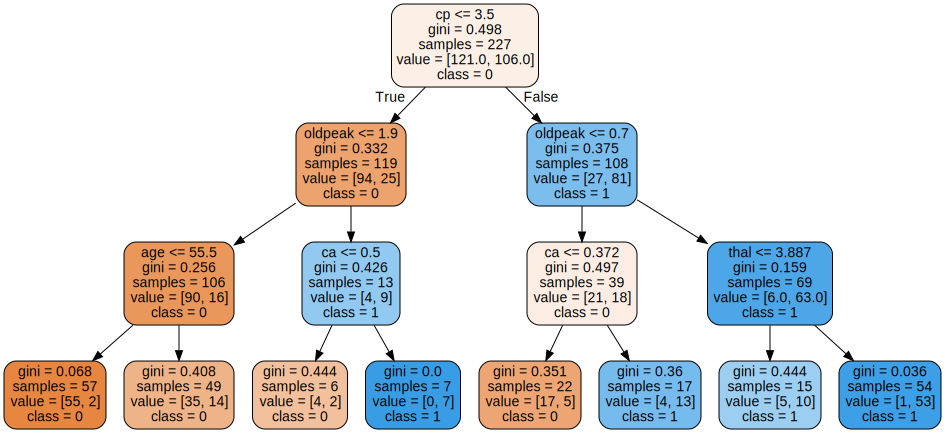

In [25]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [26]:
clf = DecisionTreeClassifier()

DecisionTreeClassifier(6) คือ maxdepth กิ่ง ไม่เกิน6

In [27]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(estimator = clf, n_estimators = 100, max_samples=0.8)

bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.81      0.67      0.73        33

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [28]:
forest = RandomForestClassifier(n_estimators=200, max_depth=6)

forest.fit(X_train, y_train)

print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.81      0.67      0.73        33

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


In [30]:
#decision tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'clf__max_depth': [2, 4, 6, 8, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, scoring='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [2, 4, 6, 8, 10],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [34]:
#bagged decision Trees
bag_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42))
])

bag_params = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_samples': [0.5, 0.8, 1.0],
    'clf__max_features': [0.5, 0.8, 1.0]
}

bag_grid = GridSearchCV(bag_pipeline, bag_params, scoring='f1_macro', cv=5)
bag_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                          random_state=42))]),
             param_grid={'clf__max_features': [0.5, 0.8, 1.0],
                         'clf__max_samples': [0.5, 0.8, 1.0],
                         'clf__n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [33]:
#random forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_params = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_depth': [4, 6, 8, None],
    'clf__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='f1_macro', cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [4, 6, 8, None],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [35]:
# 3
models = {
    "Decision Tree": dt_grid,
    "Bagging": bag_grid,
    "Random Forest": rf_grid
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{name} - Accuracy: {acc:.4f}, F1 Macro: {f1:.4f}")


Decision Tree - Accuracy: 0.6842, F1 Macro: 0.6731
Bagging - Accuracy: 0.7895, F1 Macro: 0.7797
Random Forest - Accuracy: 0.7895, F1 Macro: 0.7821


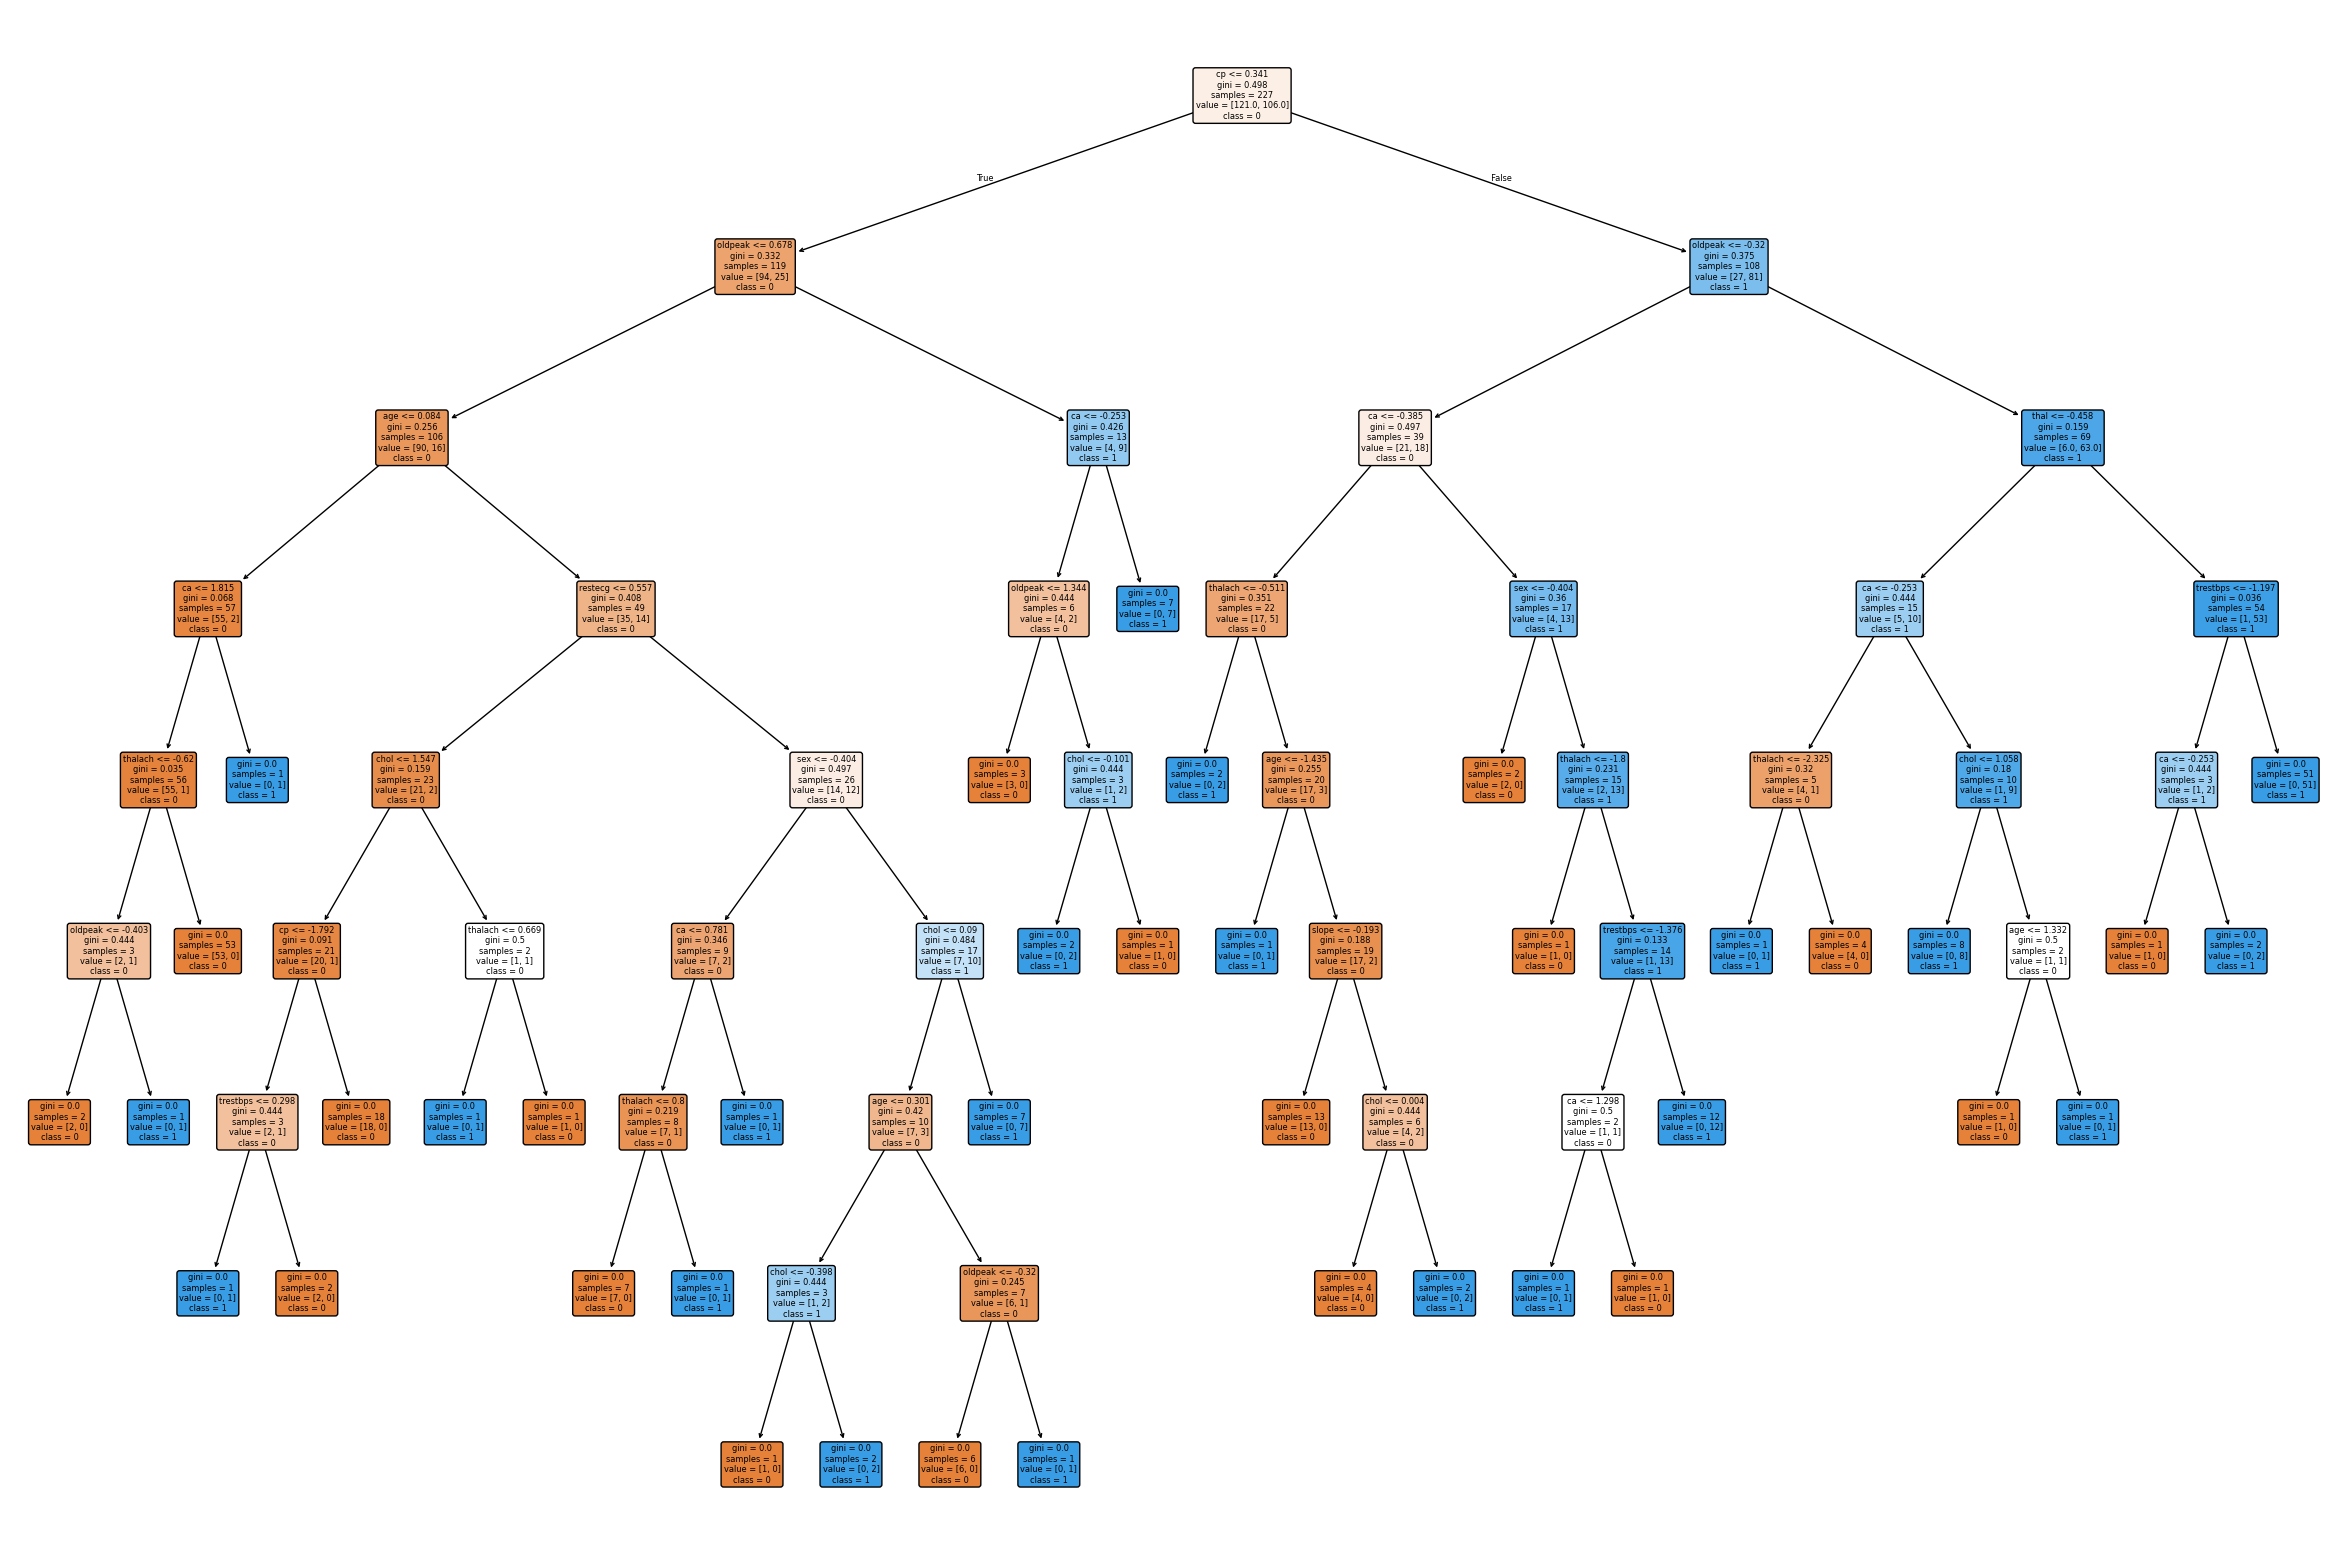

In [44]:
# Plot the best Decision Tree model
best_tree = dt_grid.best_estimator_.named_steps['clf'] # Changed 'tree' to 'clf'
plt.figure(figsize=(30, 20))
# Use feature names from the heart disease data and correct class names
plot_tree(best_tree, filled=True, rounded=True, feature_names=data.columns[:-1], class_names=['0', '1'])
plt.show()